In [2]:
import qiskit as qk
import qutip as qt
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from pylanczos import PyLanczos
import scipy 
import scipy.sparse as scs

In [3]:
def TFIM_hamiltonian(n, J, gamma):
    # uses ring shape
    id = qt.qeye(2)
    z = qt.sigmaz()
    x = qt.sigmax()
    sxi = []
    szi = []
    for i in range(n):
        sxi.append(qt.tensor([id] * i + [x] + [id] * (n - i - 1)))
        szi.append(qt.tensor([id] * i + [z] + [id] * (n - i - 1)))
    return -J * sum(szi[i] * szi[i + 1] for i in range(n - 1)) - J * szi[n - 1] * szi[0] - gamma * sum(sxi[i] for i in range(n))

In [4]:
# classically
def ground_state(h):
    results = la.eig(h)
    eigenvalues = results[0]
    Phi = results[1]
    min_index = 0
    for i in range(len(eigenvalues)):
        if np.real(eigenvalues[i]) < np.real(eigenvalues[min_index]):
            min_index = i
    return np.real(eigenvalues[min_index]), Phi[:, min_index]

In [5]:
def count_magnetization(state): #with integer encoding
    if state == 0: return 0
    return sum((state >> n) & 1 for n in range(0, int(np.log2(state)) + 1))

In [5]:
# setting J < 0 will reward alternating spin behaviors in z direction, 
# while setting J > 0 will reward aligned spin behaviors in z direction
# the |B| >> |J| state will have some finite spin since we are squaring

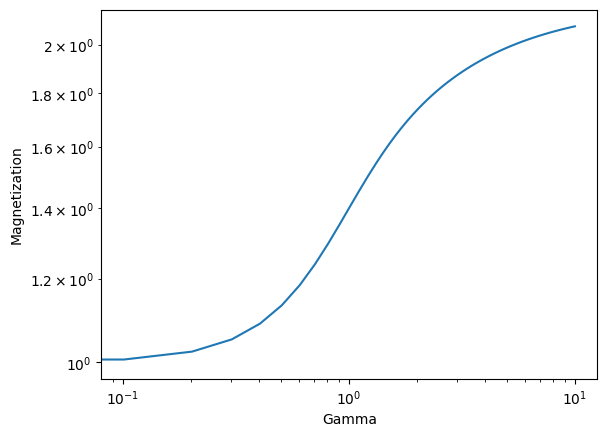

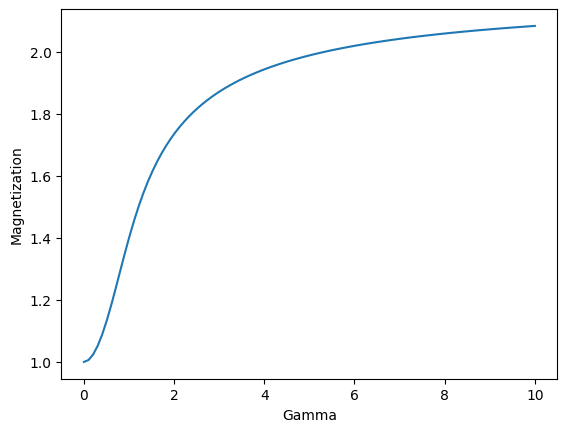

In [6]:
# for J < 0, most we can do in reasonable time is n = 7
n = 7
dim = 2 ** n
gamma_vals = np.linspace(0, 10, 100)
mag_levels = []
for gamma in gamma_vals:
    total_mag = 0
    h = TFIM_hamiltonian(n, -1, gamma).full()
    gs = ground_state(h)[1]
    for state in range(dim):
        down_spins = count_magnetization(state)
        total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
    mag_levels.append(total_mag)
plt.loglog(gamma_vals, mag_levels)
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.show()
plt.plot(gamma_vals, mag_levels)
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.show()

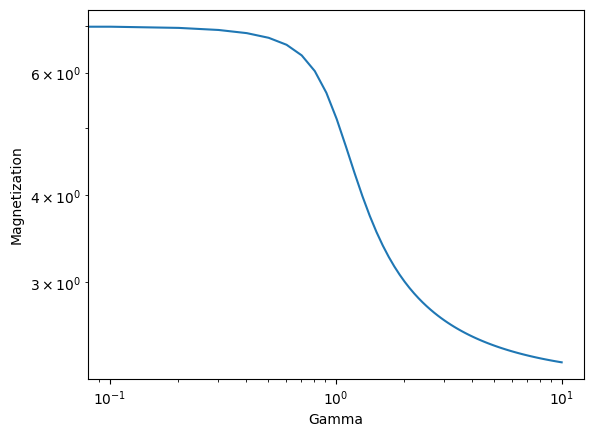

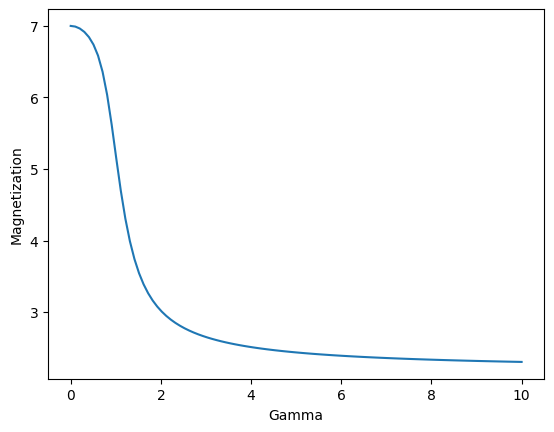

In [7]:
# for J > 0, note alternating spins has even less magnetization than 
# mostly randomized spins
# min magnetization is n % 2
n = 7
dim = 2 ** n
gamma_vals = np.linspace(0, 10, 100)
mag_levels = []
for gamma in gamma_vals:
    total_mag = 0
    h = TFIM_hamiltonian(n, 1, gamma).full()
    gs = ground_state(h)[1]
    for state in range(dim):
        down_spins = count_magnetization(state)
        total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
    mag_levels.append(total_mag)
plt.loglog(gamma_vals, mag_levels)
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.show()
plt.plot(gamma_vals, mag_levels)
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.show()

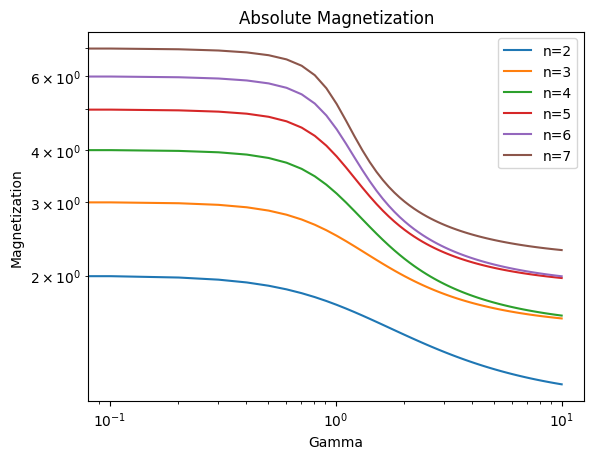

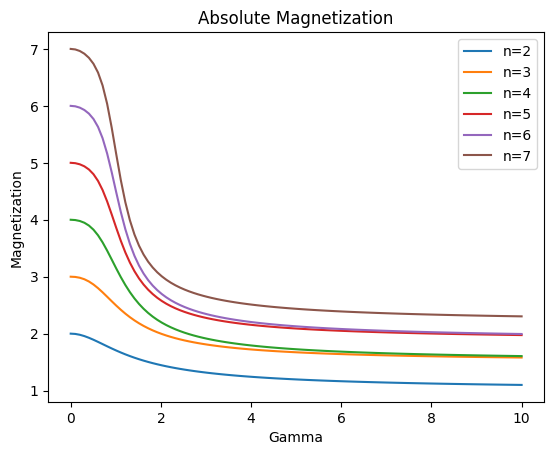

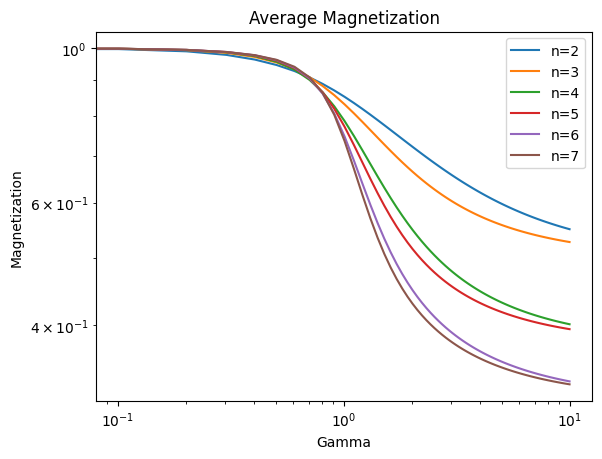

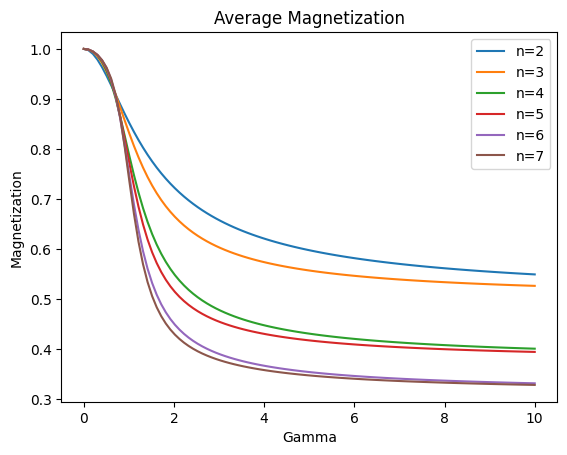

In [8]:
data = []
J = 1
gamma_vals = np.linspace(0, 10, 100)
for n in range(2, 8):
    dim = 2 ** n
    mag_levels = []
    for gamma in gamma_vals:
        total_mag = 0
        h = TFIM_hamiltonian(n, J, gamma).full()
        gs = ground_state(h)[1]
        for state in range(dim):
            down_spins = count_magnetization(state)
            total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
        mag_levels.append(total_mag)
    data.append(mag_levels)
for i in range(len(data)):
    plt.loglog(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.loglog(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()

In [9]:
data = []
J = -1
gamma_vals = np.linspace(0, 10, 100)
for n in range(2, 8):
    dim = 2 ** n
    mag_levels = []
    for gamma in gamma_vals:
        total_mag = 0
        h = TFIM_hamiltonian(n, J, gamma).full()
        gs = ground_state(h)[1]
        for state in range(dim):
            down_spins = count_magnetization(state)
            total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
        mag_levels.append(total_mag)
    data.append(mag_levels)
for i in range(len(data)):
    plt.loglog(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.loglog(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()

KeyboardInterrupt: 

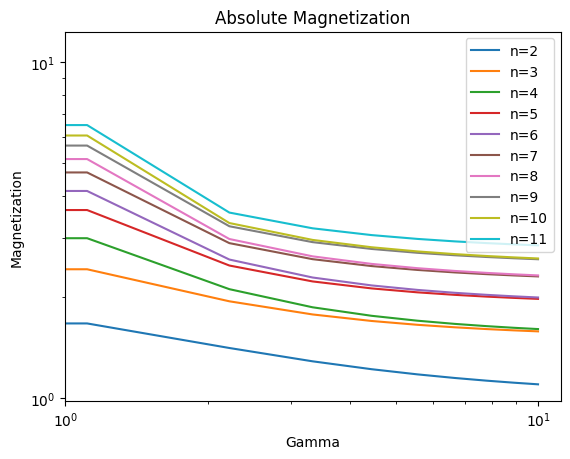

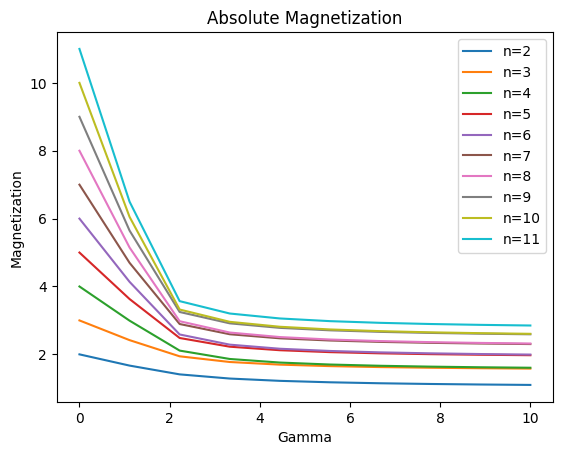

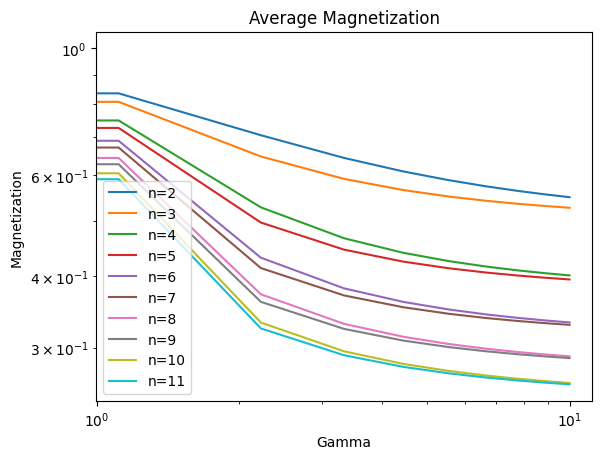

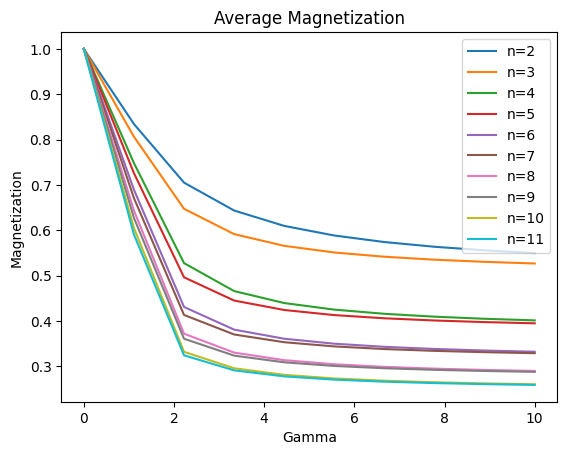

In [11]:
data = []
J = 1
gamma_vals = np.linspace(0, 10, 10)
for n in range(2, 11):
    dim = 2 ** n
    mag_levels = []
    for gamma in gamma_vals:
        total_mag = 0
        h = TFIM_hamiltonian(n, J, gamma).full()
        gs = ground_state(h)[1]
        for state in range(dim):
            down_spins = count_magnetization(state)
            total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
        mag_levels.append(total_mag)
    data.append(mag_levels)
for i in range(len(data)):
    plt.loglog(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.loglog(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()

In [6]:
def TFIM_multiply(psi, phi, N, J, Gamma):
    dim = 2 ** N
    for state in range(dim):
        jtotal = 0
        for site in range(N - 1):
            jtotal += J if ((state >> site) ^ (state >> (site + 1))) & 1 else -J 
        jtotal += J if ((state >> (N - 1)) ^ (state >> 0)) & 1 else -J
        phi[state] = jtotal * psi[state]
    
    for state in range(dim):
        for site in range(N):
            flipped_state = state ^ (1 << site)
            phi[flipped_state] -= Gamma*psi[state]
    

In [11]:
N = 5
J = 1
Gamma = 10
engine = PyLanczos.create_custom(lambda i, o: TFIM_multiply(i, o, N, J, Gamma), 2 ** N, 'float64', False, 1)
evals, emat = engine.run()

In [12]:
evals

array([-50.12510556], dtype=float64)

In [13]:
emat 

array([[-0.20033466],
       [-0.18080245],
       [-0.18080245],
       [-0.18032783],
       [-0.18080245],
       [-0.16360181],
       [-0.18032783],
       [-0.18032783],
       [-0.18080245],
       [-0.16360181],
       [-0.16360181],
       [-0.16360181],
       [-0.18032783],
       [-0.16360181],
       [-0.18032783],
       [-0.18080245],
       [-0.18080245],
       [-0.18032783],
       [-0.16360181],
       [-0.18032783],
       [-0.16360181],
       [-0.16360181],
       [-0.16360181],
       [-0.18080245],
       [-0.18032783],
       [-0.18032783],
       [-0.16360181],
       [-0.18080245],
       [-0.18032783],
       [-0.18080245],
       [-0.18080245],
       [-0.20033466]], dtype=float64)

In [14]:
h = TFIM_hamiltonian(N, J, Gamma).full()
# print(la.eig(h))
print(ground_state(h))

(np.float64(-50.12510556199569), array([0.20033466+0.j, 0.18080245-0.j, 0.18080245-0.j, 0.18032783-0.j,
       0.18080245-0.j, 0.16360181-0.j, 0.18032783-0.j, 0.18032783-0.j,
       0.18080245-0.j, 0.16360181-0.j, 0.16360181-0.j, 0.16360181-0.j,
       0.18032783-0.j, 0.16360181-0.j, 0.18032783-0.j, 0.18080245-0.j,
       0.18080245-0.j, 0.18032783-0.j, 0.16360181-0.j, 0.18032783-0.j,
       0.16360181-0.j, 0.16360181-0.j, 0.16360181-0.j, 0.18080245-0.j,
       0.18032783-0.j, 0.18032783-0.j, 0.16360181-0.j, 0.18080245-0.j,
       0.18032783-0.j, 0.18080245-0.j, 0.18080245-0.j, 0.20033466-0.j]))


In [15]:
state = qt.rand_ket(2 ** N).full()
state

array([[-0.0386464 +0.2431234j ],
       [-0.05343877-0.00273628j],
       [-0.05955918-0.01290663j],
       [ 0.10367392+0.0777065j ],
       [ 0.16989427-0.09910546j],
       [ 0.08904863+0.00585795j],
       [-0.13113034-0.03663266j],
       [-0.01350269-0.08475941j],
       [-0.20474066+0.05691198j],
       [ 0.12947383-0.04694541j],
       [ 0.1498079 +0.13034774j],
       [-0.15373329+0.11887109j],
       [ 0.06264566+0.13151753j],
       [ 0.02794912+0.1610355j ],
       [ 0.14044841+0.02710552j],
       [ 0.06762342-0.15237029j],
       [-0.35202229-0.0291278j ],
       [-0.0241546 +0.19439108j],
       [ 0.21581629+0.00733306j],
       [ 0.07533065+0.17652314j],
       [ 0.26382361+0.13550066j],
       [ 0.07084006+0.11165836j],
       [-0.17126131+0.10125404j],
       [ 0.00673371-0.16051954j],
       [ 0.13207365+0.19435009j],
       [-0.05855568-0.01782396j],
       [-0.16205115-0.15417898j],
       [-0.01685319+0.04686946j],
       [-0.11865264+0.05330493j],
       [ 0.037

In [16]:
h @ state

array([[ 5.19189836-0.34597518j],
       [-2.54051508-4.73859886j],
       [-2.93565455-4.20587372j],
       [ 1.94535889-2.0276255j ],
       [-2.62730573-4.69456331j],
       [-1.750274  -0.84335324j],
       [-0.52906463+0.72075212j],
       [-1.34599062+2.74433991j],
       [-4.14880573-6.58084539j],
       [ 4.81361428-3.30341957j],
       [ 4.84578245+0.03301348j],
       [-4.79845882-0.19946661j],
       [-0.21163064-2.12404228j],
       [-3.78353342+2.84775871j],
       [-2.86416635-0.76421247j],
       [ 0.20857848-3.17324489j],
       [-5.13710318-7.71785517j],
       [ 3.20261486-2.57932574j],
       [ 7.34308167-0.79363846j],
       [-2.92749206-1.83432867j],
       [ 4.8034899 -0.97333877j],
       [-3.52145874+0.32792352j],
       [-5.30046822+0.83846315j],
       [ 0.66701645-3.98932994j],
       [ 8.82815048+0.7147881j ],
       [-2.52630675-2.12357826j],
       [-6.52885166-4.26002418j],
       [ 3.29476516-2.38387058j],
       [-6.08049358-2.93022157j],
       [ 1.034

In [17]:
state.flatten()

array([-0.0386464 +0.2431234j , -0.05343877-0.00273628j,
       -0.05955918-0.01290663j,  0.10367392+0.0777065j ,
        0.16989427-0.09910546j,  0.08904863+0.00585795j,
       -0.13113034-0.03663266j, -0.01350269-0.08475941j,
       -0.20474066+0.05691198j,  0.12947383-0.04694541j,
        0.1498079 +0.13034774j, -0.15373329+0.11887109j,
        0.06264566+0.13151753j,  0.02794912+0.1610355j ,
        0.14044841+0.02710552j,  0.06762342-0.15237029j,
       -0.35202229-0.0291278j , -0.0241546 +0.19439108j,
        0.21581629+0.00733306j,  0.07533065+0.17652314j,
        0.26382361+0.13550066j,  0.07084006+0.11165836j,
       -0.17126131+0.10125404j,  0.00673371-0.16051954j,
        0.13207365+0.19435009j, -0.05855568-0.01782396j,
       -0.16205115-0.15417898j, -0.01685319+0.04686946j,
       -0.11865264+0.05330493j,  0.03794654-0.17452499j,
        0.12342516+0.00084838j, -0.02878173+0.11030883j])

In [18]:
phi = [0] * (2 ** N)
TFIM_multiply(state.flatten(), phi, N, J, Gamma)
phi

[np.complex128(5.1918983572030895-0.34597518258167764j),
 np.complex128(-2.54051507672881-4.7385988595158866j),
 np.complex128(-2.9356545501732754-4.2058737215751565j),
 np.complex128(1.9453588920665208-2.027625501034257j),
 np.complex128(-2.627305728225168-4.694563305510812j),
 np.complex128(-1.7502740036921531-0.8433532388918494j),
 np.complex128(-0.5290646262145284+0.7207521185829338j),
 np.complex128(-1.3459906178479077+2.744339911863105j),
 np.complex128(-4.148805727880511-6.580845388435818j),
 np.complex128(4.813614284917938-3.303419574289709j),
 np.complex128(4.845782448026707+0.03301347905344176j),
 np.complex128(-4.798458819149346-0.19946661100659363j),
 np.complex128(-0.21163063682463656-2.124042278245545j),
 np.complex128(-3.783533423029044+2.8477587060787077j),
 np.complex128(-2.8641663459484232-0.7642124695592047j),
 np.complex128(0.20857848167430143-3.1732448890765568j),
 np.complex128(-5.137103184413134-7.717855167886882j),
 np.complex128(3.2026148550466065-2.57932574217

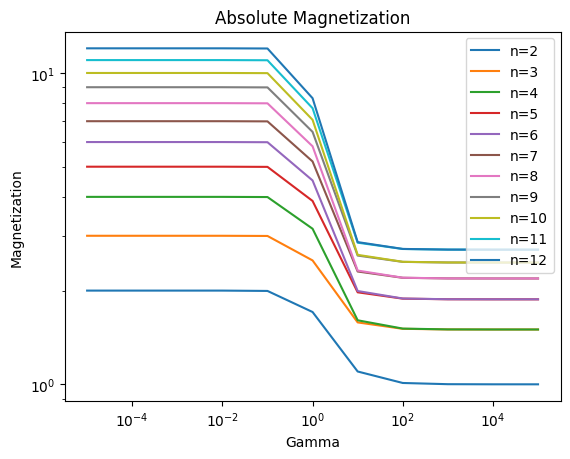

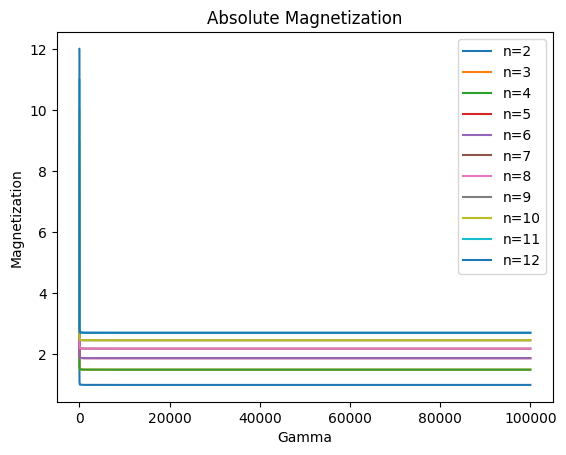

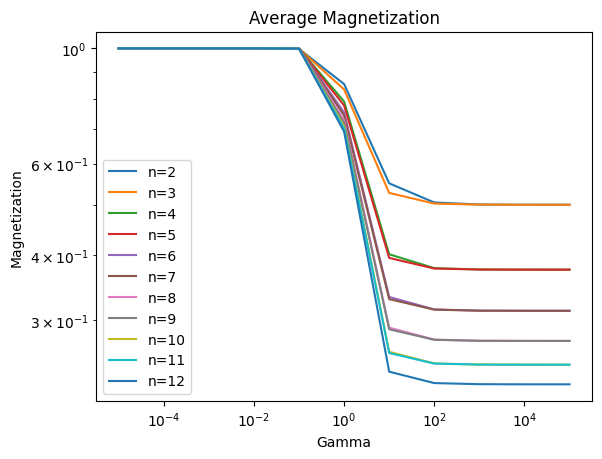

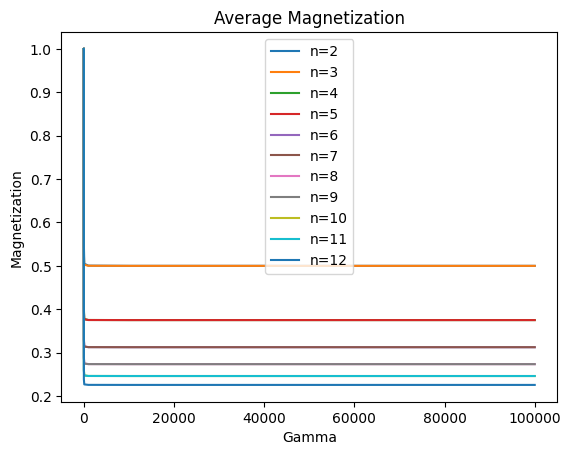

In [39]:
data = []
J = 1
gamma_vals = [1e-5 ,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
for n in range(2, 13):
    dim = 2 ** n
    mag_levels = []
    for gamma in gamma_vals:
        total_mag = 0
        engine = PyLanczos.create_custom(lambda i, o : TFIM_multiply(i, o, n, J, gamma), dim, 'float64', False, 1)
        gs = engine.run()[1].flatten()
        for state in range(dim):
            down_spins = count_magnetization(state)
            total_mag += abs(gs[state]) ** 2 * abs(down_spins - (n - down_spins))
        mag_levels.append(total_mag)
    data.append(mag_levels)
for i in range(len(data)):
    plt.loglog(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, data[i], label = f'n={i+2}')
plt.title('Absolute Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.loglog(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()
for i in range(len(data)):
    plt.plot(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()

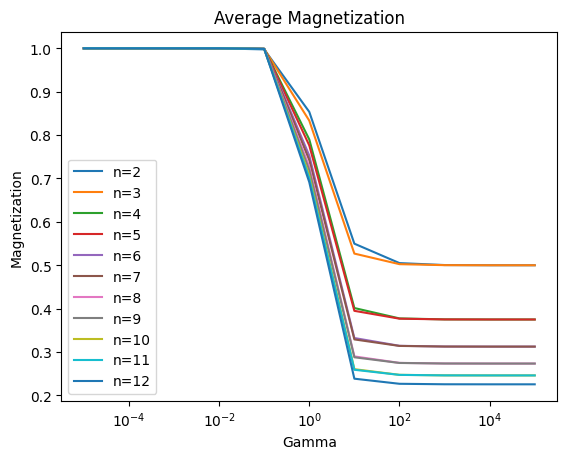

In [43]:
for i in range(len(data)):
    plt.plot(gamma_vals, np.array(data[i]) / (i + 2), label = f'n={i+2}')
plt.xscale('log')
plt.title('Average Magnetization')
plt.xlabel("Gamma")
plt.ylabel("Magnetization")
plt.legend(loc = 'best')
plt.show()

In [36]:
np.array(data)[:, -1]/np.array(range(2, 14))

array([0.54975186, 0.52689536, 0.40143672, 0.39497246, 0.3323062 ,
       0.32908235, 0.28993681, 0.28792401, 0.26052846, 0.25912013,
       0.23857608, 0.2375201 ])

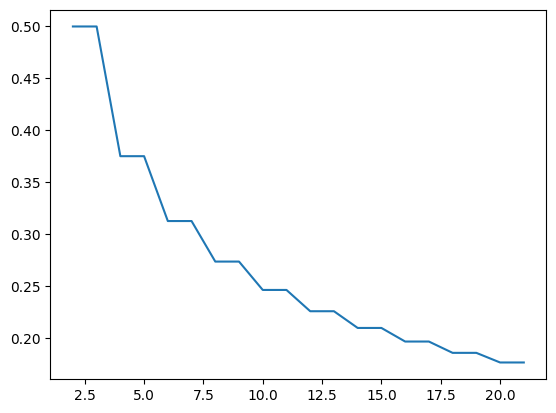

In [44]:
ns = [n for n in range(2, 22)]
avg_mag = []
for n in ns:
    mag_total = 0
    for i in range(2 ** n):
        down_spins = count_magnetization(i)
        mag_total += abs(down_spins - (n - down_spins))
    avg_mag.append(mag_total / (n * 2 ** n))
plt.plot(ns, avg_mag)
plt.show()

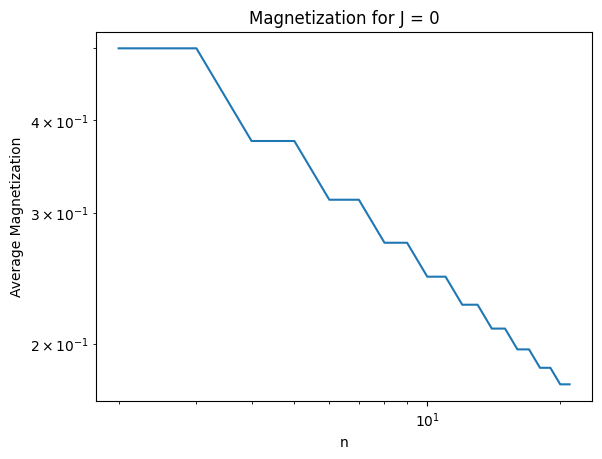

In [48]:
plt.loglog(ns, avg_mag)
plt.title('Magnetization for J = 0')
plt.ylabel('Average Magnetization')
plt.xlabel('n')
plt.show()

In [47]:
(np.log10(avg_mag[-1]) - np.log10(avg_mag[0]))/(np.log10(ns[-1]) - np.log10(ns[0]))

np.float64(-0.44357237870007593)

In [19]:
id = scs.identity(2)
print(id.toarray())
z = scs.csr_matrix(([1, -1], ([0, 1], [0, 1])), shape=(2, 2), dtype = 'float64')
print(z.toarray())
x = scs.csr_matrix(([1, 1], ([0, 1], [1, 0])), shape=(2, 2), dtype = 'float64')
print(x.toarray())

[[1. 0.]
 [0. 1.]]
[[ 1.  0.]
 [ 0. -1.]]
[[0. 1.]
 [1. 0.]]


In [20]:
z * z

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 2)>

In [7]:
def kron_sparse_list(stuff):
    result = stuff[0]
    for i in range(1, len(stuff)):
        result = scs.kron(result, stuff[i])
    return result

def TFIM_sparse(n, J, gamma):
    id = scs.identity(2)
    z = scs.csr_matrix(([1, -1], ([0, 1], [0, 1])), shape=(2, 2), dtype = 'float64')
    x = scs.csr_matrix(([1, 1], ([0, 1], [1, 0])), shape=(2, 2), dtype = 'float64')
    sxi = []
    szi = []
    for i in range(n):
        sxi.append(kron_sparse_list([id] * i + [x] + [id] * (n - i - 1)))
        szi.append(kron_sparse_list([id] * i + [z] + [id] * (n - i - 1)))
    return -J * sum(szi[i] * szi[i + 1] for i in range(n - 1)) - J * szi[n - 1] * szi[0] - gamma * sum(sxi[i] for i in range(n))

def TFIM_multiply_sparse(psi, phi, H):
    phi = H * psi

In [22]:
id = scs.identity(2)
z = scs.csr_matrix(([1, -1], ([0, 1], [0, 1])), shape=(2, 2), dtype = 'float64')
x = scs.csr_matrix(([1, 1], ([0, 1], [1, 0])), shape=(2, 2), dtype = 'float64')
kron_sparse_list([id, id, id, id, id, id, id, id, id, z])

<Block Sparse Row sparse matrix of dtype 'float64'
	with 524288 stored elements (blocksize=2x2) and shape (1024, 1024)>

In [23]:
TFIM_sparse(10, 1, 1)

<Block Sparse Row sparse matrix of dtype 'float64'
	with 20480 stored elements (blocksize=2x2) and shape (1024, 1024)>

In [24]:
TFIM_hamiltonian(10, 1, 1)

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape=(1024, 1024), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-10.  -1.  -1. ...   0.   0.   0.]
 [ -1.  -6.   0. ...   0.   0.   0.]
 [ -1.   0.  -6. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  -6.   0.  -1.]
 [  0.   0.   0. ...   0.  -6.  -1.]
 [  0.   0.   0. ...  -1.  -1. -10.]]

In [25]:
print(TFIM_hamiltonian(2, 1, 1).full() == TFIM_sparse(2, 1, 1).toarray())

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [4]:
N = 10
J = 1
Gamma = 1
h = TFIM_hamiltonian(N, J, Gamma)
res = h.groundstate(sparse=True)
print(res[0])

NameError: name 'TFIM_hamiltonian' is not defined

In [18]:
res = h.groundstate(sparse=False)
print(res[0])

-12.784906442999322


In [30]:
print(h.data)

CSR(shape=(1024, 1024), nnz=11264)


In [3]:
qt.core.data.CSR.as_scipy

<cyfunction CSR.as_scipy at 0x0000022C6F7C6810>

In [40]:
h.__reduce__()

(<function copyreg._reconstructor(cls, base, state)>,
 (qutip.core.qobj.Qobj, object, None),
 {'_isherm': True,
  '_isunitary': None,
  '_data': CSR(shape=(1024, 1024), nnz=11264),
  '_dims': Dimensions(Compound(Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2)), Compound(Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2), Space(2))),
  'qutip_version': '5.0.4'})

In [19]:
print(ground_state(h.full()))

(np.float64(-12.784906442999258), array([0.41058428+0.00000000e+00j, 0.11434388-4.62223187e-32j,
       0.11434388-7.08742220e-32j, ..., 0.11434388-6.77927340e-31j,
       0.11434388-6.59438413e-31j, 0.41058428-2.37890867e-30j]))


In [31]:
import scipy.sparse.linalg as ssl
ssl.eigs(h.data)

TypeError: type not understood

In [37]:
engine = PyLanczos.create_custom(lambda i, o : TFIM_multiply(i, o, N, J, Gamma), 2 ** N, 'float64', False, 1)
evals, emat = engine.run()
print(evals, emat.flatten())

[-8.] [-0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625
 -0.0625 -0.0625 -0.0625 -0.0625 -0.0625 -0.0

In [ ]:
abs(0.05918548+0.02008306j)

0.06250000273435194

In [76]:
N = 8
J = 1
Gamma = 10
engine = PyLanczos.create_custom(lambda i, o: TFIM_multiply(i, o, N, J, Gamma), 2 ** N, 'float64', False, 1)
evals, emat = engine.run()
print(evals, emat)

[-80.20012533] [[-0.07635044]
 [-0.06890639]
 [-0.06890639]
 [-0.06872495]
 [-0.06890639]
 [-0.06234336]
 [-0.06872495]
 [-0.068716  ]
 [-0.06890639]
 [-0.06219572]
 [-0.06234336]
 [-0.06218721]
 [-0.06872495]
 [-0.06218721]
 [-0.068716  ]
 [-0.06871548]
 [-0.06890639]
 [-0.06218906]
 [-0.06219572]
 [-0.0620329 ]
 [-0.06234336]
 [-0.05640631]
 [-0.06218721]
 [-0.06218006]
 [-0.06872495]
 [-0.0620329 ]
 [-0.06218721]
 [-0.06203241]
 [-0.068716  ]
 [-0.06218006]
 [-0.06871548]
 [-0.068716  ]
 [-0.06890639]
 [-0.06219572]
 [-0.06218906]
 [-0.0620329 ]
 [-0.06219572]
 [-0.05627873]
 [-0.0620329 ]
 [-0.06203241]
 [-0.06234336]
 [-0.05627873]
 [-0.05640631]
 [-0.05627192]
 [-0.06218721]
 [-0.05627827]
 [-0.06218006]
 [-0.06218721]
 [-0.06872495]
 [-0.0620329 ]
 [-0.0620329 ]
 [-0.06187811]
 [-0.06218721]
 [-0.05627192]
 [-0.06203241]
 [-0.0620329 ]
 [-0.068716  ]
 [-0.06203241]
 [-0.06218006]
 [-0.0620329 ]
 [-0.06871548]
 [-0.06218721]
 [-0.068716  ]
 [-0.06872495]
 [-0.06890639]
 [-0.06234

In [77]:
h_sparse = TFIM_sparse(N, J, Gamma)
engine = PyLanczos.create_custom(lambda i, o: TFIM_multiply_sparse(i, o, h_sparse), 2 ** N, 'float64', False, 1)
evals, emat = engine.run()
print(evals, emat)

[0.] [[-3.77859827e-02]
 [-5.67456724e-02]
 [ 5.98794314e-02]
 [-9.80721181e-02]
 [-7.70097379e-02]
 [ 7.77068634e-02]
 [-4.63066050e-02]
 [ 1.03282756e-01]
 [ 7.76475905e-02]
 [-3.94580694e-02]
 [ 3.66450656e-02]
 [ 9.19382447e-02]
 [-8.23886671e-02]
 [ 5.57963753e-02]
 [-4.43802134e-03]
 [-6.97366926e-02]
 [-1.01858040e-01]
 [-5.00496975e-03]
 [ 4.51185218e-02]
 [ 7.81335374e-02]
 [ 8.47964520e-02]
 [ 1.51026106e-02]
 [-4.54507142e-02]
 [-5.49930056e-02]
 [ 7.41920616e-02]
 [-5.99437037e-02]
 [ 1.00721620e-01]
 [ 1.38874210e-02]
 [-1.00047548e-01]
 [-6.67406109e-02]
 [ 8.38559416e-02]
 [ 6.18048077e-03]
 [-1.87324864e-03]
 [ 4.99595001e-02]
 [-9.37815459e-02]
 [-2.58786541e-02]
 [ 4.15471106e-02]
 [-8.06479000e-02]
 [-6.02725939e-04]
 [ 3.52033013e-02]
 [ 4.02671048e-02]
 [ 8.10053615e-02]
 [-6.33208447e-02]
 [-4.71247590e-02]
 [ 7.08686273e-02]
 [-8.85567092e-02]
 [ 5.84708642e-02]
 [ 4.58807178e-03]
 [ 9.59227148e-02]
 [ 7.84864725e-02]
 [-2.40622845e-02]
 [-8.91929986e-02]
 [ 8.30

In [67]:
h = TFIM_hamiltonian(N, J, Gamma).full()
# print(la.eig(h))
print(ground_state(h))

(np.float64(-80.2001253345864), array([0.07635044+0.00000000e+00j, 0.06890639-3.08148791e-33j,
       0.06890639-6.16297582e-33j, 0.06872495-3.08148791e-33j,
       0.06890639-3.08148791e-33j, 0.06234336+6.16297582e-33j,
       0.06872495-6.16297582e-33j, 0.068716  +3.08148791e-33j,
       0.06890639-3.08148791e-33j, 0.06219572+6.16297582e-33j,
       0.06234336+6.16297582e-33j, 0.06218721+0.00000000e+00j,
       0.06872495-3.08148791e-33j, 0.06218721+3.08148791e-33j,
       0.068716  +3.08148791e-33j, 0.06871548+0.00000000e+00j,
       0.06890639-3.08148791e-33j, 0.06218906+3.08148791e-33j,
       0.06219572+6.16297582e-33j, 0.0620329 -3.08148791e-33j,
       0.06234336+3.08148791e-33j, 0.05640631+0.00000000e+00j,
       0.06218721+0.00000000e+00j, 0.06218006+3.08148791e-33j,
       0.06872495-3.08148791e-33j, 0.0620329 -3.08148791e-33j,
       0.06218721+0.00000000e+00j, 0.06203241+0.00000000e+00j,
       0.068716  +3.08148791e-33j, 0.06218006+3.08148791e-33j,
       0.06871548-6.162